<a href="https://colab.research.google.com/github/jrakhshanda55/Ausaf_ML/blob/main/Industrial_Economics_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy.stats import boxcox, shapiro
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold

In [4]:
df = pd.read_excel('/content/Data_Assignment2.xlsx')
df = df.iloc[:,1:]

In [5]:
df.head()

,F1,KVM,ANT_FOR1,ANT_VAG1,U2_KONT,U2_LA,U2_KOM,NYAVAK,BEFOLKNI
0,226,989.0,12,8.3,1974,97145,2310,2248,59482
1,60,372.0,6,3,698,71549,807,673,20431
2,222,794.0,14.9,6,2035,54719,2277,2835,56681
3,200,686.0,8.9,4,1829,97144,1550,2936,36581
4,151,688.0,11.3,3,1356,91745,1550,2936,34056


In [6]:
df['ANT_VAG1'] = pd.to_numeric(df['ANT_VAG1'], errors='coerce')
df['U2_KONT'] = pd.to_numeric(df['U2_KONT'], errors='coerce')
df['ANT_FOR1'] = pd.to_numeric(df['ANT_FOR1'], errors='coerce')
df= df.astype(np.float64)
df.dtypes

F1          float64
KVM         float64
ANT_FOR1    float64
ANT_VAG1    float64
U2_KONT     float64
U2_LA       float64
U2_KOM      float64
NYAVAK      float64
BEFOLKNI    float64
dtype: object

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

F1          0
KVM         0
ANT_FOR1    0
ANT_VAG1    0
U2_KONT     0
U2_LA       0
U2_KOM      0
NYAVAK      0
BEFOLKNI    0
dtype: int64

In [9]:
# Compute skewness and kurtosis for each numeric column
skewness = df.skew()
kurt = df.kurtosis()

# Create a DataFrame to store skewness and kurtosis
skew_kurt_df = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurt})

# Display the original DataFrame with additional skewness and kurtosis
df_description = df.describe(include='all')
df_description = pd.concat([df_description, skew_kurt_df.transpose()])

# Display the DataFrame with added statistics
df_description.iloc[1:,:]


,F1,KVM,ANT_FOR1,ANT_VAG1,U2_KONT,U2_LA,U2_KOM,NYAVAK,BEFOLKNI
mean,109.263359,724.790076,9.991489,4.482023,1046.938931,18401.828244,3150.145038,4127.305344,61828.354962
std,96.618673,663.623834,8.596736,3.640779,853.631739,25931.396438,7270.414413,13195.146338,133619.695071
min,6.000000,148.000000,0.750000,1.500000,39.000000,165.000000,119.000000,85.000000,3303.000000
25%,49.000000,321.250000,4.925000,3.000000,467.250000,1800.250000,519.000000,374.250000,11597.250000
50%,81.000000,476.500000,7.000000,3.000000,740.500000,7421.500000,831.000000,717.500000,19525.000000
75%,141.000000,835.250000,12.937500,5.000000,1387.500000,30350.000000,1686.250000,1535.500000,38509.500000
max,812.000000,3658.000000,49.480000,26.800000,4954.000000,97145.000000,37499.000000,74438.000000,731726.000000
Skewness,2.608314,2.565987,2.107566,3.782561,1.649588,1.773961,3.755591,4.782299,3.965774
Kurtosis,11.771543,7.495876,5.411693,18.693466,2.806974,2.138600,13.921453,22.480811,15.953863


# EDA


In [10]:
# Function to format x-axis ticks as thousands
def format_k(x, pos):
    if x < 1000:
        return f'{x:.0f}'
    else:
        return f'{x/1000:.0f}k'

<ipython-input-11-ac73244d01c1>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(9, 2, i * 2 - 1)
<ipython-input-11-ac73244d01c1>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(9, 2, i * 2)
<ipython-input-11-ac73244d01c1>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(9, 2, i * 2 - 1)
<ipython-input-11-ac73244d01c1>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(9, 2, i * 2)
<ipython-input-11-ac73244d01c1>:7: MatplotlibDeprecati

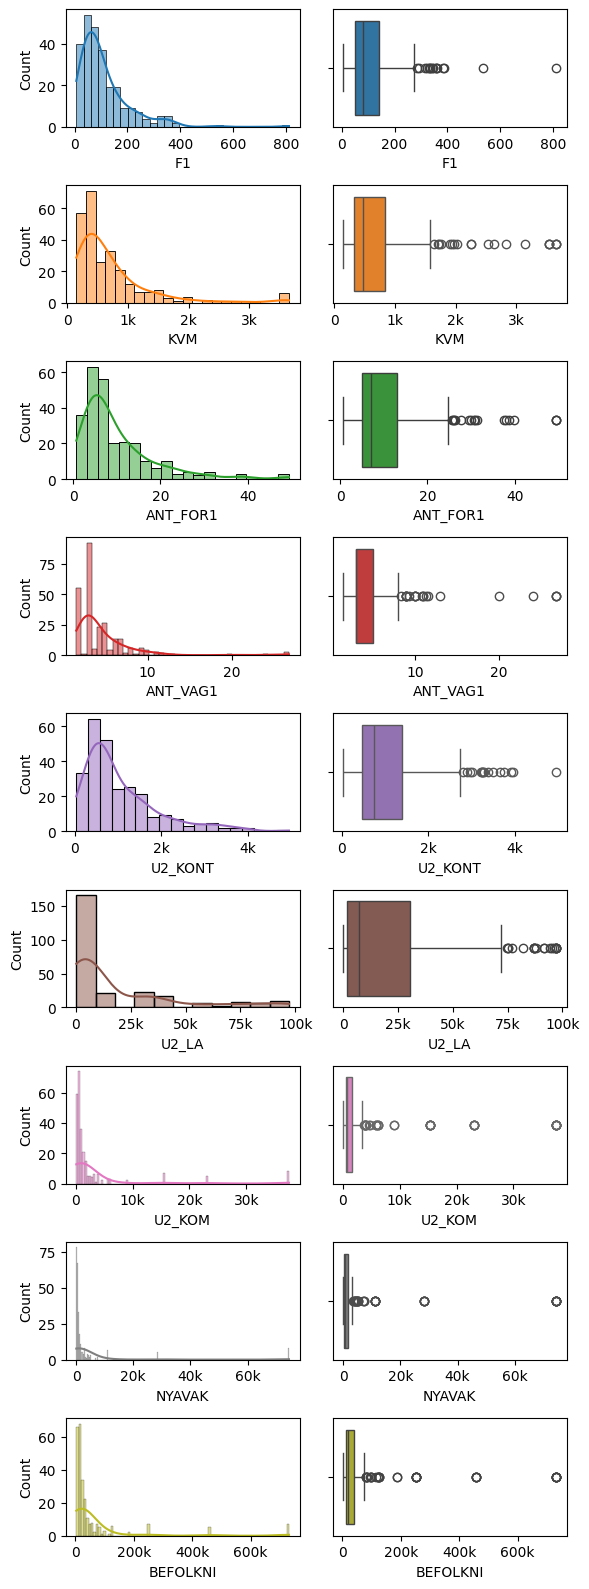

In [11]:

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(6, 16))

# Create a pastel color palette
colors  = sns.color_palette(n_colors=df.shape[1])

for i, feature in enumerate(df.columns, start=1):
    plt.subplot(9, 2, i * 2 - 1)
    sns.histplot(df[feature], color=colors[i - 1], kde=True)

    plt.subplot(9, 2, i * 2)
    sns.boxplot(x=df[feature], color=colors[i - 1], whis=1.5)

# Formatting x-axis ticks as thousands for each 100
for ax in fig.axes:
    ax.xaxis.set_major_formatter(FuncFormatter(format_k))
plt.tight_layout()
plt.show()


# Data Transformation

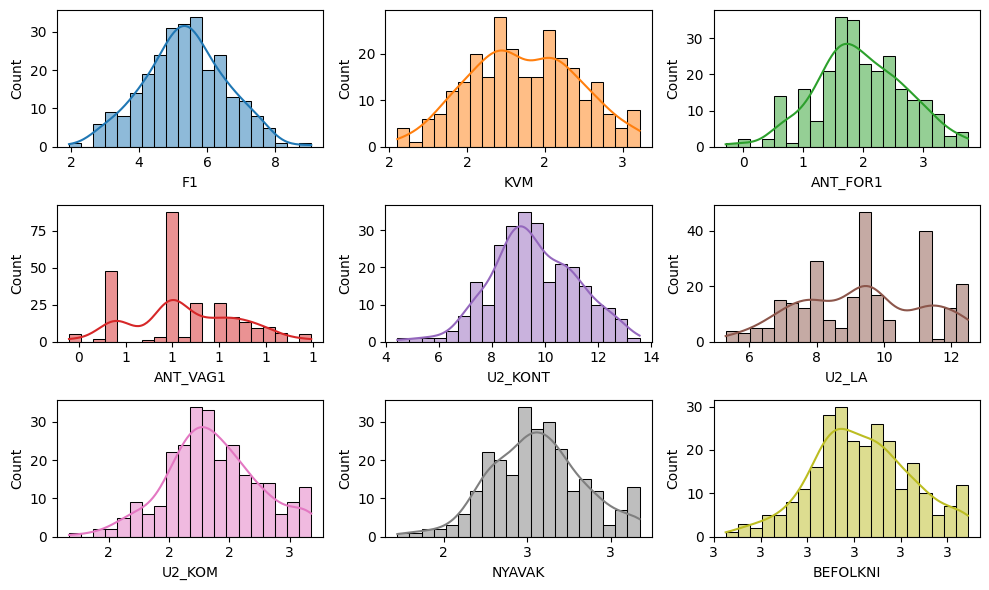

In [13]:
df_transformed = df.apply(lambda x: boxcox(x)[0])
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 6))

# Create a pastel color palette
pastel_palette = sns.color_palette(n_colors=df_transformed.shape[1])  # Use df_transformed instead of df

for ax, col, color in zip(axes.flatten(), df_transformed.columns, pastel_palette):  # Use df_transformed instead of df
    sns.histplot(data=df_transformed, x=col, bins=20, edgecolor='black', kde=True, color=color, ax=ax)

# Formatting x-axis ticks as thousands for each 100
for ax in fig.axes:
    ax.xaxis.set_major_formatter(FuncFormatter(format_k))

plt.tight_layout()
plt.show()


Shapiro-Wilk Test Statistic: 0.997049868106842
P-value: 0.9134241938591003
The target variable appears to be normally distributed (fail to reject H0)


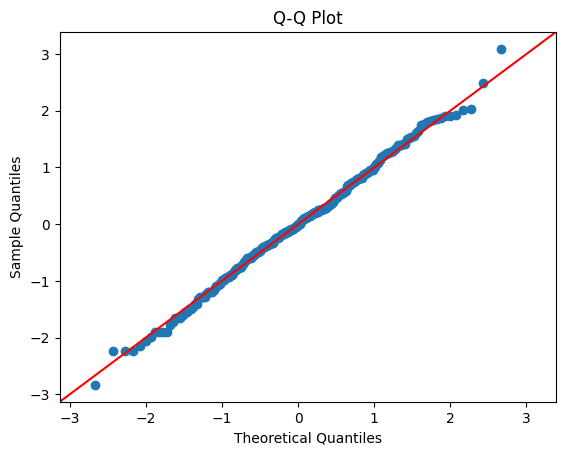

In [14]:
# Perform Shapiro-Wilk test for normality
statistic, p_value = shapiro(df_transformed.F1)

# Display the results
print(f"Shapiro-Wilk Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check the null hypothesis (H0)
if p_value > 0.05:
    print("The target variable appears to be normally distributed (fail to reject H0)")
else:
    print("The target variable does not appear to be normally distributed (reject H0)")

# Generate a Q-Q plot against a normal distribution
sm.qqplot(df_transformed.F1, line='45', fit=True)
plt.title('Q-Q Plot')
plt.show()

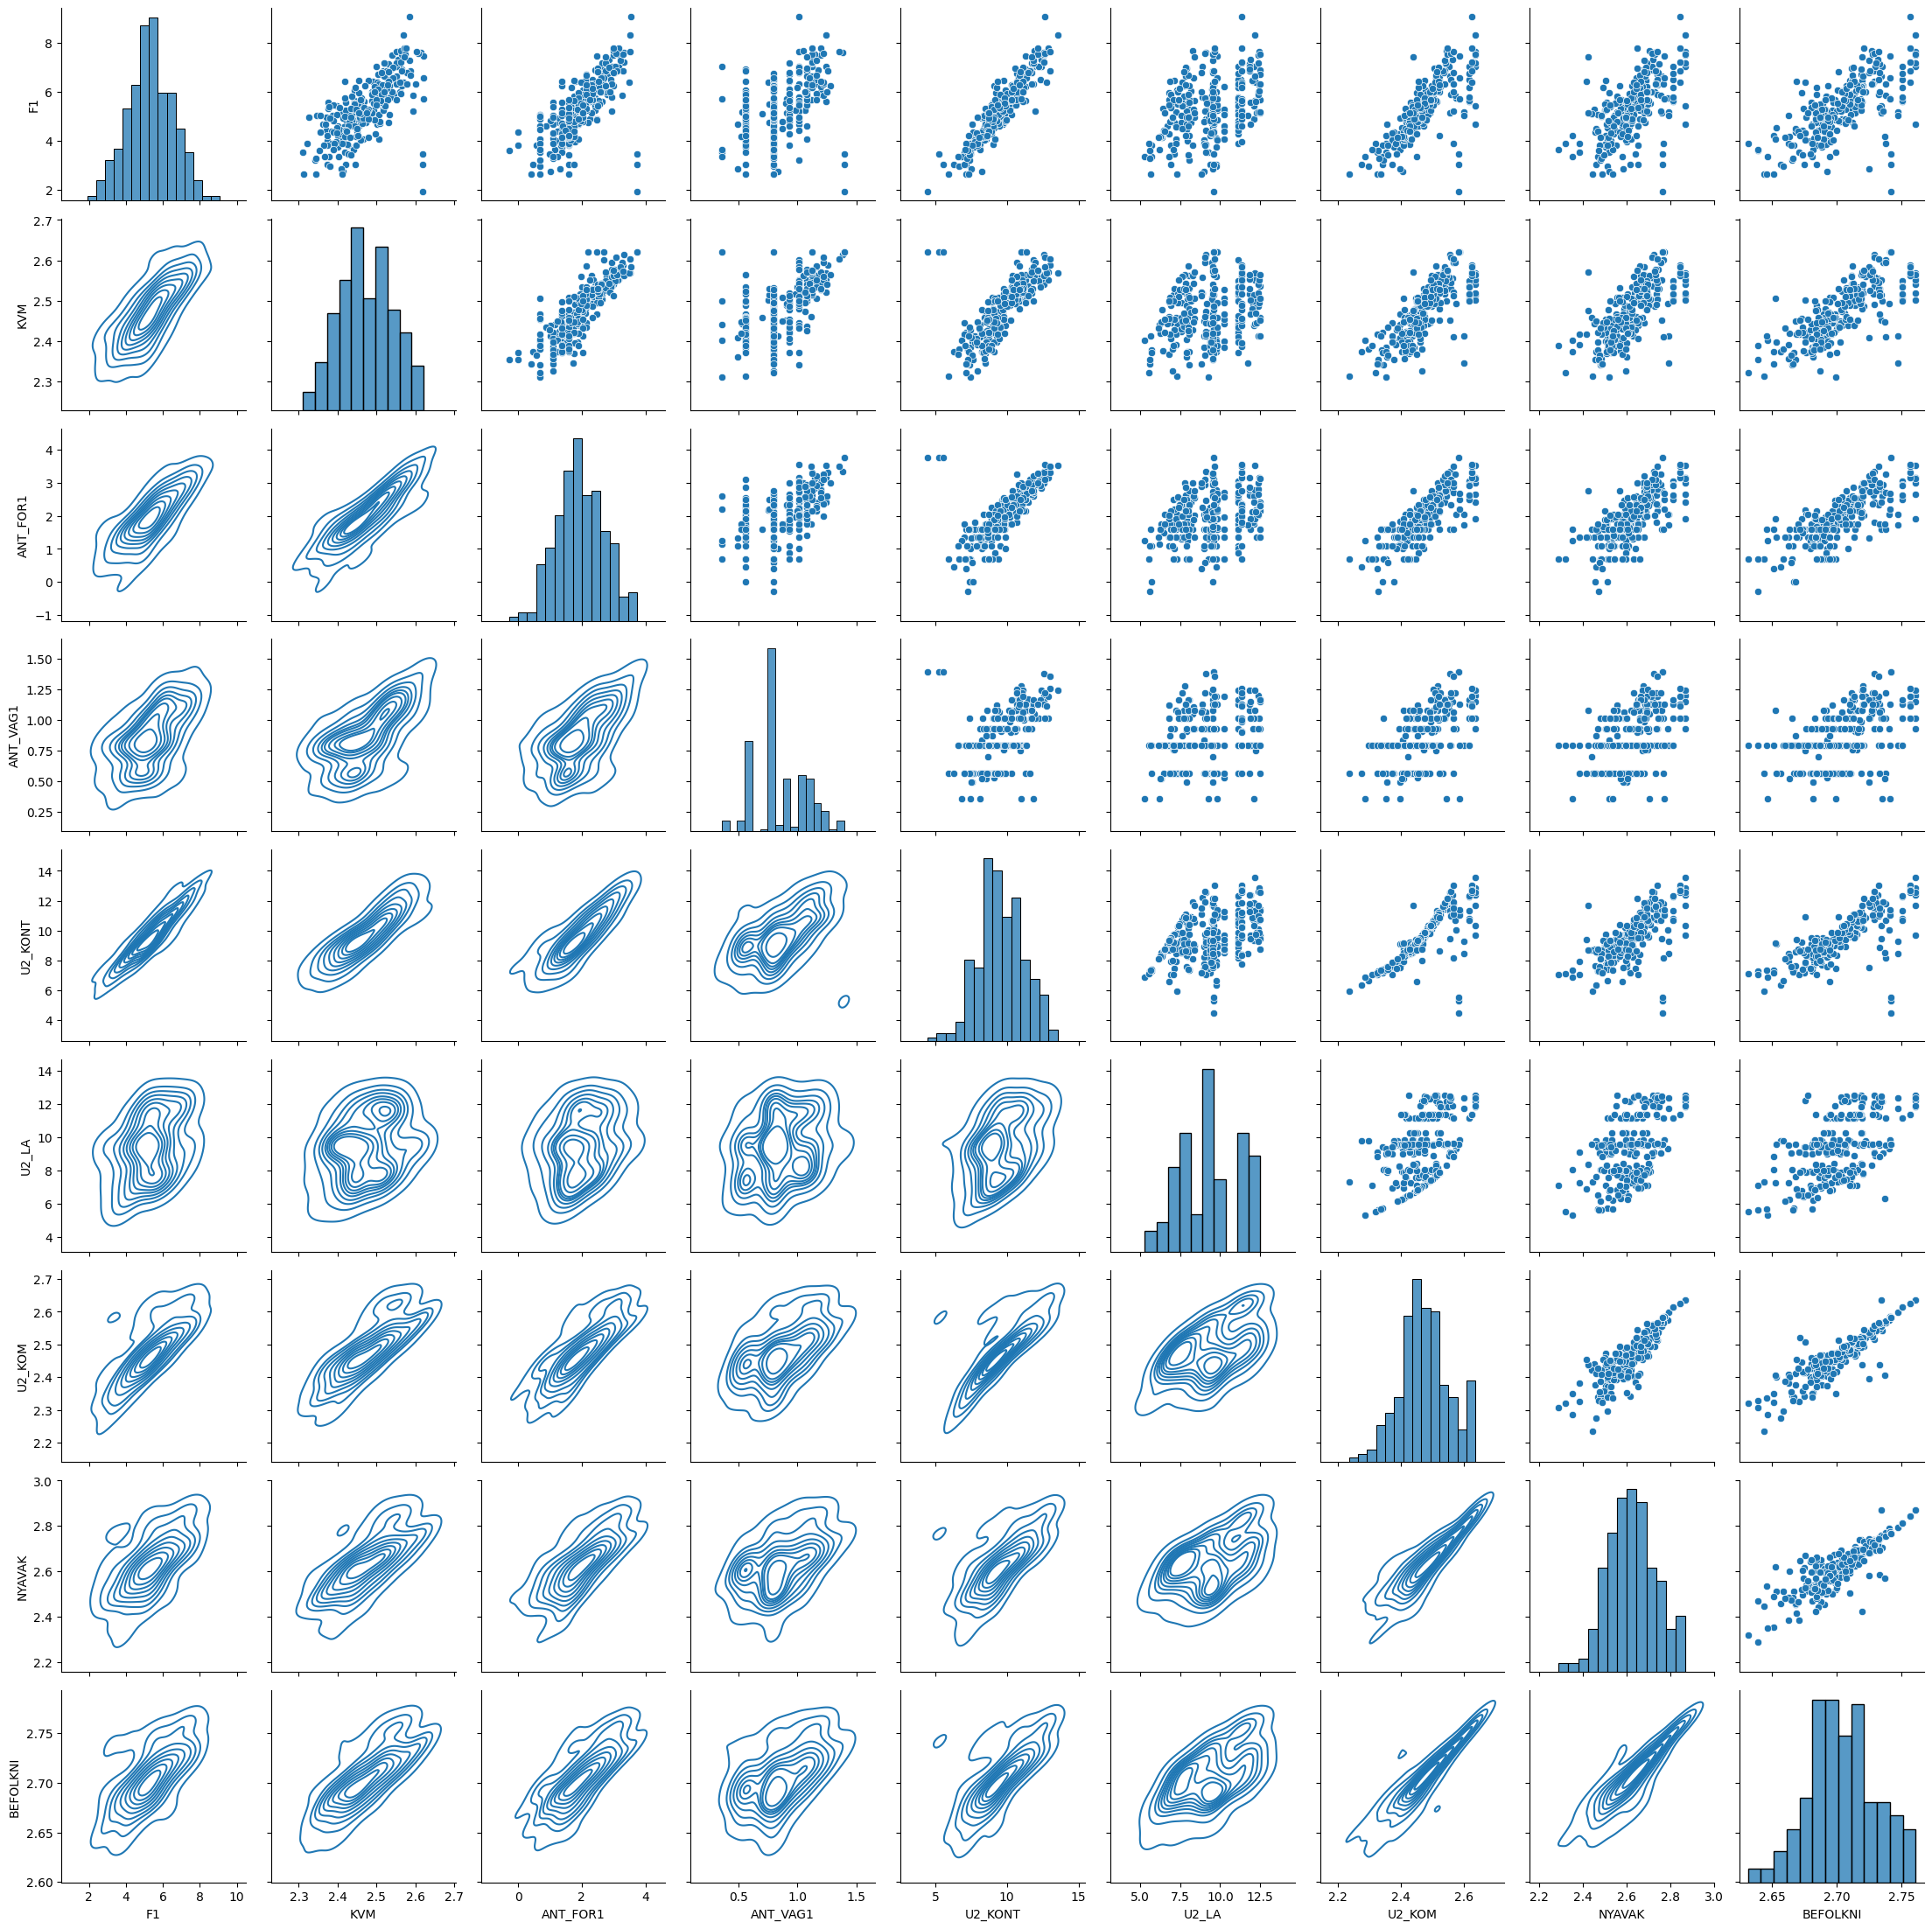

In [15]:
#g = sns.PairGrid(df_transformed, diag_sharey=False)
#g.map_upper(sns.scatterplot)
#g.map_lower(sns.kdeplot)
#g.map_diag(sns.histplot)

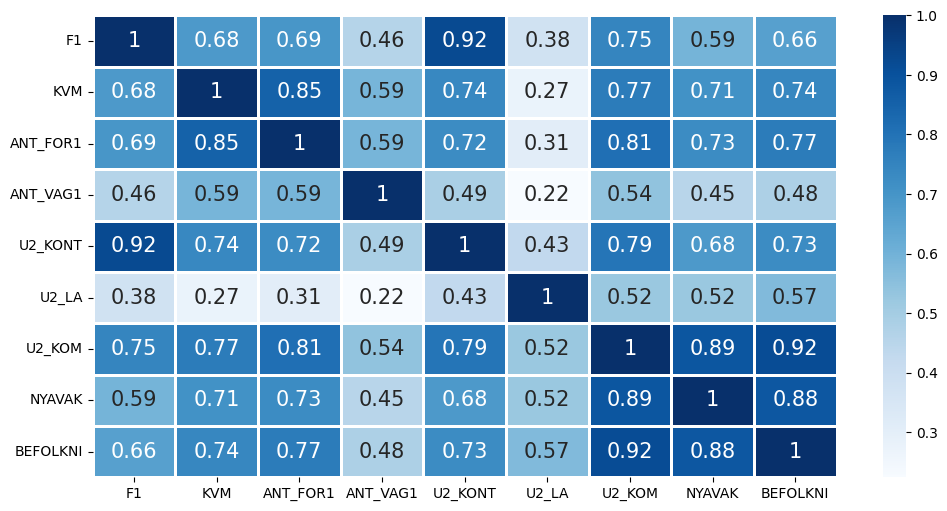

In [81]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_transformed.corr(), annot=True, cmap='Blues', linewidths=1, linecolor='white',annot_kws={"size": 15})
plt.xticks(rotation=0)
plt.show()

## Multocollinearity Analysis

The variance inflation factor (VIF) reveal varying degrees of multicollinearity among the input features in the regression model. The VIF results on our input features indicate that some variables like ANT_FOR1, U2_KOM, NYAVAK, and BEFOLKNI show strong correlation, which could lead to redundancy. On the other hand, U2_LA has a lower level of correlation. Variables like KVM, ANT_VAG1, and U2_KONT fall in between.

In [102]:
X = df_transformed.iloc[:, 1:]
y=df_transformed.F1
X['Intercept'] = 1
X = X.astype(np.float64)
vif = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
vif.sort_values(ascending=False)

Intercept    53267.060296
U2_KOM          10.156653
BEFOLKNI         8.092278
NYAVAK           5.542182
ANT_FOR1         4.801459
KVM              4.477509
U2_KONT          3.095819
U2_LA            1.705033
ANT_VAG1         1.638838
dtype: float64

# Methodology
Training on All data Features without Exclusing multicollinear features

Average Residuals across all folds: 0.003188474418528158
Fold 1 Train MSE: 0.20173696252880682
Fold 2 Train MSE: 0.19034526770031857
Fold 3 Train MSE: 0.1820020593753553
Fold 4 Train MSE: 0.19273885282656292
Fold 5 Train MSE: 0.17606706007129003
Average Train MSE across all folds: 0.18857804050046673
Fold 1 Test MSE: 0.16580650682531214
Fold 2 Test MSE: 0.19773765704042845
Fold 3 Test MSE: 0.23544270769557604
Fold 4 Test MSE: 0.19005184514347456
Fold 5 Test MSE: 0.27259754989251844
Average Test MSE across all folds: 0.21232725331946192


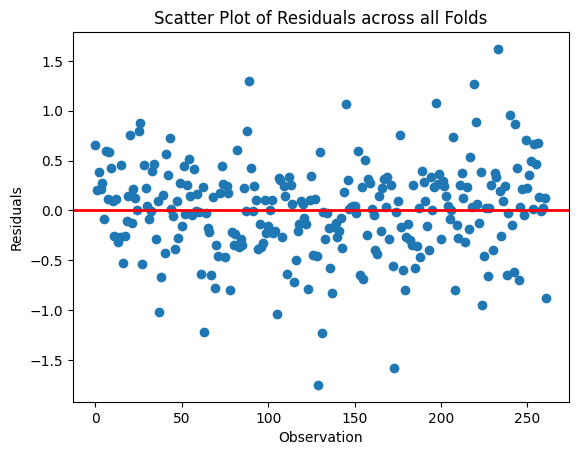

In [145]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import numpy as np

X = df_transformed.iloc[:, 1:]
y = df_transformed.F1
num_folds = 5

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store residuals, train MSE, and test MSE for each fold
residuals_list = []
train_mse_list = []
test_mse_list = []

# Iterate over folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Add a constant term to the independent variables matrix for the intercept
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)

    # Instantiate the OLS model
    model = sm.OLS(y_train, X_train)

    # Train the model on the training set
    results = model.fit()

    # Get predictions on the training set
    train_predictions = results.predict(X_train)

    # Get predictions on the testing set
    test_predictions = results.predict(X_test)

    # Calculate residuals for the testing set and append to the list
    residuals = y_test - test_predictions
    residuals_list.append(residuals)

    # Calculate MSE for training set and append to the list
    train_mse = np.mean((train_predictions - y_train) ** 2)
    train_mse_list.append(train_mse)

    # Calculate MSE for testing set and append to the list
    test_mse = np.mean((test_predictions - y_test) ** 2)
    test_mse_list.append(test_mse)

# Concatenate residuals from all folds
all_residuals = np.concatenate(residuals_list)

# Calculate and print the average residuals across all folds
average_residuals = np.mean(all_residuals)
print(f"Average Residuals across all folds: {average_residuals}")

# Print MSE values for each fold for training set
for i, mse in enumerate(train_mse_list):
    print(f"Fold {i + 1} Train MSE: {mse}")

# Print average MSE across all folds for training set
average_train_mse = np.mean(train_mse_list)
print(f"Average Train MSE across all folds: {average_train_mse}")

# Print MSE values for each fold for testing set
for i, mse in enumerate(test_mse_list):
    print(f"Fold {i + 1} Test MSE: {mse}")

# Print average MSE across all folds for testing set
average_test_mse = np.mean(test_mse_list)
print(f"Average Test MSE across all folds: {average_test_mse}")

# Visualize the residuals
plt.scatter(range(len(all_residuals)), all_residuals)
plt.axhline(y=0, color='r', linestyle='-', linewidth=2)  # Add a horizontal line at y=0 for reference
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.title('Scatter Plot of Residuals across all Folds')
plt.show()

In [150]:
residuals_list

[6      0.400094
 9      0.166170
 10     0.266098
 15     0.094309
 18     0.077487
 19    -0.270405
 24     0.388561
 25    -0.083514
 30     0.395967
 33     0.469282
 45     0.017577
 46    -0.637197
 66     0.161606
 67    -0.178332
 68    -0.377556
 73     0.547996
 75    -0.623357
 81    -0.215114
 82    -0.117394
 89     0.043513
 93     0.685108
 112   -0.084038
 114    0.047551
 116    0.016522
 117    0.058528
 120    0.571492
 140    0.525604
 143   -0.460595
 144    0.475610
 149    0.142506
 153   -0.016712
 162   -0.344716
 171    0.384004
 173    0.505911
 178    0.601675
 188   -0.361254
 195    0.091299
 196   -0.965363
 197   -0.286709
 209    0.453491
 211   -0.096352
 212    0.926404
 216    0.373044
 218    1.048734
 228    0.107070
 233   -0.383606
 235   -0.312331
 241    0.084889
 249    0.117254
 251    0.177664
 252   -0.123715
 256    0.667678
 263    0.109118
 dtype: float64,
 2      0.138856
 5      0.311367
 16     0.133561
 29    -0.054359
 31     0.4321

In [146]:
sns.histplot(all_residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


TypeError: object of type 'numpy.float64' has no len()

Shapiro-Wilk Test Statistic: 0.961671769618988
P-value: 0.08702167123556137
The target variable appears to be normally distributed (fail to reject H0)


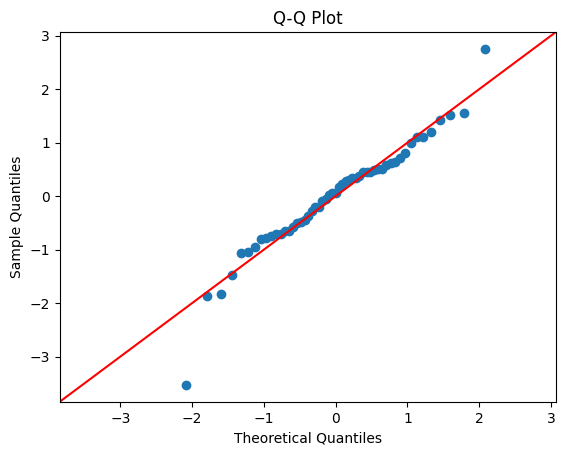

In [142]:
# Perform Shapiro-Wilk test for normality
statistic, p_value = shapiro(residuals)

# Display the results
print(f"Shapiro-Wilk Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check the null hypothesis (H0)
if p_value > 0.05:
    print("The target variable appears to be normally distributed (fail to reject H0)")
else:
    print("The target variable does not appear to be normally distributed (reject H0)")

# Generate a Q-Q plot against a normal distribution
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot')
plt.show()

# OLS with Selected Data Features

In [128]:
X.columns

Index(['KVM', 'ANT_FOR1', 'ANT_VAG1', 'U2_KONT', 'U2_LA', 'U2_KOM', 'NYAVAK',
       'BEFOLKNI'],
      dtype='object')

Average Residuals across all folds: -0.0010778730536834527
Fold 1 Train MSE: 0.22425201431579758
Fold 2 Train MSE: 0.20928746052373334
Fold 3 Train MSE: 0.20194439917043916
Fold 4 Train MSE: 0.2086814957839853
Fold 5 Train MSE: 0.20963660092531008
Average Train MSE across all folds: 0.21076039414385309
Fold 1 Test MSE: 0.16819574036897644
Fold 2 Test MSE: 0.22645843845666902
Fold 3 Test MSE: 0.2573735131692398
Fold 4 Test MSE: 0.22853516448215447
Fold 5 Test MSE: 0.2258396895701996
Average Test MSE across all folds: 0.22128050920944786


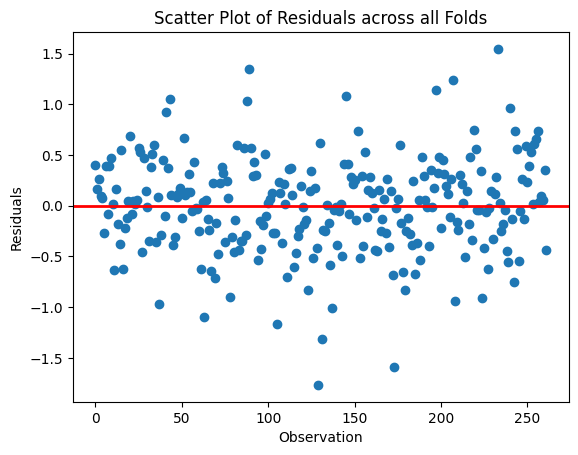

In [147]:
X = df_transformed.iloc[:, 1:]
y=df_transformed.F1
X = X[['KVM', 'ANT_FOR1', 'ANT_VAG1','U2_KONT']]

num_folds = 5

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store residuals, train MSE, and test MSE for each fold
residuals_list = []
train_mse_list = []
test_mse_list = []

# Iterate over folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Add a constant term to the independent variables matrix for the intercept
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)

    # Instantiate the OLS model
    model = sm.OLS(y_train, X_train)

    # Train the model on the training set
    results = model.fit()

    # Get predictions on the training set
    train_predictions = results.predict(X_train)

    # Get predictions on the testing set
    test_predictions = results.predict(X_test)

    # Calculate residuals for the testing set and append to the list
    residuals = y_test - test_predictions
    residuals_list.append(residuals)

    # Calculate MSE for training set and append to the list
    train_mse = np.mean((train_predictions - y_train) ** 2)
    train_mse_list.append(train_mse)

    # Calculate MSE for testing set and append to the list
    test_mse = np.mean((test_predictions - y_test) ** 2)
    test_mse_list.append(test_mse)

# Concatenate residuals from all folds
all_residuals = np.concatenate(residuals_list)

# Calculate and print the average residuals across all folds
average_residuals = np.mean(all_residuals)
print(f"Average Residuals across all folds: {average_residuals}")

# Print MSE values for each fold for training set
for i, mse in enumerate(train_mse_list):
    print(f"Fold {i + 1} Train MSE: {mse}")

# Print average MSE across all folds for training set
average_train_mse = np.mean(train_mse_list)
print(f"Average Train MSE across all folds: {average_train_mse}")

# Print MSE values for each fold for testing set
for i, mse in enumerate(test_mse_list):
    print(f"Fold {i + 1} Test MSE: {mse}")

# Print average MSE across all folds for testing set
average_test_mse = np.mean(test_mse_list)
print(f"Average Test MSE across all folds: {average_test_mse}")

# Visualize the residuals
plt.scatter(range(len(all_residuals)), all_residuals)
plt.axhline(y=0, color='r', linestyle='-', linewidth=2)  # Add a horizontal line at y=0 for reference
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.title('Scatter Plot of Residuals across all Folds')
plt.show()

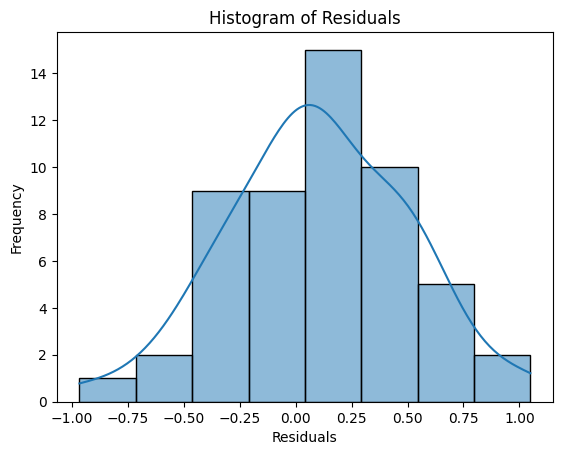

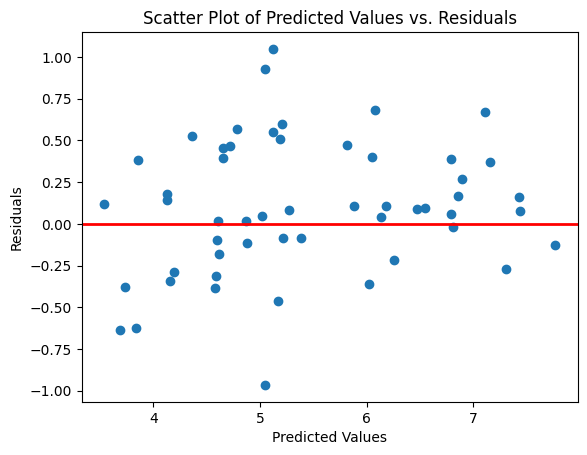

In [131]:
residuals = y_test - y_preds

sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


# Scatter plot
plt.scatter(y_preds, residuals)
plt.axhline(y=0, color='r', linestyle='-', linewidth=2)  # Add a horizontal line at y=0 for reference
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Scatter Plot of Predicted Values vs. Residuals')
plt.show()

- Points above the red line indicate underpredictions.
- Points below the red line indicate overpredictions.
If the plot shows a random distribution of points around the red line, it suggests that your model's predictions are unbiased. If there's a pattern or structure in the residuals, it may indicate that the model has room for improvement.

Shapiro-Wilk Test Statistic: 0.9900446534156799
P-value: 0.9364315867424011
The target variable appears to be normally distributed (fail to reject H0)


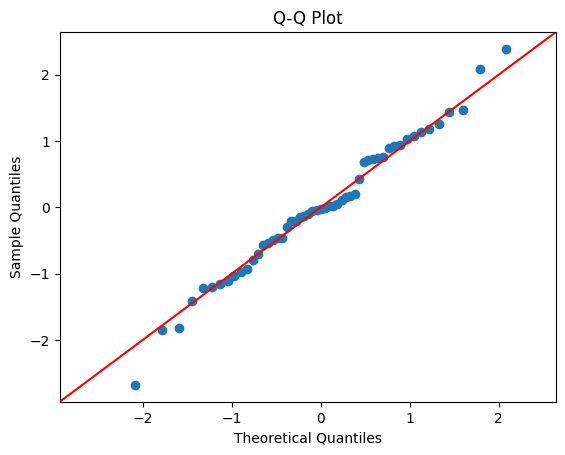

In [132]:
# Perform Shapiro-Wilk test for normality
statistic, p_value = shapiro(residuals)

# Display the results
print(f"Shapiro-Wilk Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check the null hypothesis (H0)
if p_value > 0.05:
    print("The target variable appears to be normally distributed (fail to reject H0)")
else:
    print("The target variable does not appear to be normally distributed (reject H0)")

# Generate a Q-Q plot against a normal distribution
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot')
plt.show()

In [148]:
average_residuals

-0.0010778730536834527